## Data Loading and database Creation for the Agricultural products traded by Kenya


In [74]:
#Importing Libraries 
import pandas as pd
from sqlalchemy import create_engine
import glob 
import os

In [75]:
df = pd.read_csv('data/trade.csv')

In [76]:
df.head()

reporter_name          partner_name    year trade_flow  \
0         Kenya           Afghanistan  2021.0     EXPIMP   
1         Kenya                Angola  2021.0     EXPIMP   
2         Kenya               Anguila  2021.0     EXPIMP   
3         Kenya               Albania  2021.0     EXPIMP   
4         Kenya  United Arab Emirates  2021.0     EXPIMP   

           product_group  export_(us$_thousand)  import_(us$_thousand)  \
0  Textiles and Clothing                  28.14                  15.43   
1  Textiles and Clothing                   3.27                   0.37   
2  Textiles and Clothing                   0.00                   0.01   
3  Textiles and Clothing                   0.00                   4.94   
4  Textiles and Clothing                 547.81               11565.52   

   export_product_share_(%)  import_product_share_(%)  \
0                  0.510000                     39.36   
1                  0.340000                      1.07   
2                 16.746331                    100.00   
3                 16.746331                     40.89   
4                  0.170000                      0.71   

   revealed_comparative_advantage  ...  mfn_total_tariff_lines  \
0                        8.027711  ...                    32.0   
1                        0.100000  ...                     4.0   
2                        8.027711  ...                     1.0   
3                        0.340000  ...                     1.0   
4                        0.150000  ...                   239.0   

   mfn_dutiable_tariff_lines_share_(%)  mfn_duty_free_tariff_lines_share_(%)  \
0                                90.63                                  0.00   
1                                25.00                                  0.00   
2                               100.00                                  0.00   
3                               100.00                                  0.00   
4                                97.49                                  1.26   

   mfn_specific_tariff_lines_share_(%)  mfn_ave_tariff_lines_share_(%)  \
0                                  0.0                            9.38   
1                                  0.0                           75.00   
2                                  0.0                            0.00   
3                                  0.0                            0.00   
4                                  0.0                            1.26   

   mfn_maxrate_(%)  mfn_minrate_(%)  mfn_specificduty_imports_(us$_thousand)  \
0             52.3             25.0                                      0.0   
1             52.3             10.0                                      0.0   
2             35.0             35.0                                      0.0   
3             35.0             35.0                                      0.0   
4             52.3              0.0                                      0.0   

   mfn_dutiable_imports_(us$_thousand)  mfn_duty_free_imports_(us$_thousand)  
0                                15.43                                   0.0  
1                                 0.37                                   0.0  
2                                 0.01                                   0.0  
3                                 4.94                                   0.0  
4                             11367.51                                 194.9  

[5 rows x 36 columns]

In [77]:
df.columns

Index(['reporter_name', 'partner_name', 'year', 'trade_flow', 'product_group',
       'export_(us$_thousand)', 'import_(us$_thousand)',
       'export_product_share_(%)', 'import_product_share_(%)',
       'revealed_comparative_advantage', 'world_growth_(%)',
       'country_growth_(%)', 'ahs_simple_average_(%)',
       'ahs_weighted_average_(%)', 'ahs_total_tariff_lines',
       'ahs_dutiable_tariff_lines_share_(%)',
       'ahs_duty_free_tariff_lines_share_(%)',
       'ahs_specific_tariff_lines_share_(%)', 'ahs_ave_tariff_lines_share_(%)',
       'ahs_maxrate_(%)', 'ahs_minrate_(%)',
       'ahs_specificduty_imports_(us$_thousand)',
       'ahs_dutiable_imports_(us$_thousand)',
       'ahs_duty_free_imports_(us$_thousand)', 'mfn_simple_average_(%)',
       'mfn_weighted_average_(%)', 'mfn_total_tariff_lines',
       'mfn_dutiable_tariff_lines_share_(%)',
       'mfn_duty_free_tariff_lines_share_(%)',
       'mfn_specific_tariff_lines_share_(%)', 'mfn_ave_tariff_lines_share_(%)',
   

In [78]:
# Retain the original structure and logic to multiply "_thousand" columns
original_structure = [
    'reporter_name', 'partner_name', 'year', 'trade_flow', 'product_group',
    'export_(us$_thousand)', 'import_(us$_thousand)',
    'export_product_share_(%)', 'import_product_share_(%)',
    'revealed_comparative_advantage', 'world_growth_(%)',
    'country_growth_(%)', 'ahs_simple_average_(%)',
    'ahs_weighted_average_(%)', 'ahs_total_tariff_lines',
    'ahs_dutiable_tariff_lines_share_(%)',
    'ahs_duty_free_tariff_lines_share_(%)',
    'ahs_specific_tariff_lines_share_(%)', 'ahs_ave_tariff_lines_share_(%)',
    'ahs_maxrate_(%)', 'ahs_minrate_(%)',
    'ahs_specificduty_imports_(us$_thousand)',
    'ahs_dutiable_imports_(us$_thousand)',
    'ahs_duty_free_imports_(us$_thousand)', 'mfn_simple_average_(%)',
    'mfn_weighted_average_(%)', 'mfn_total_tariff_lines',
    'mfn_dutiable_tariff_lines_share_(%)',
    'mfn_duty_free_tariff_lines_share_(%)',
    'mfn_specific_tariff_lines_share_(%)', 'mfn_ave_tariff_lines_share_(%)',
    'mfn_maxrate_(%)', 'mfn_minrate_(%)',
    'mfn_specificduty_imports_(us$_thousand)',
    'mfn_dutiable_imports_(us$_thousand)',
    'mfn_duty_free_imports_(us$_thousand)'
]


# Identify columns with '_thousand' in their names
thousand_columns = [col for col in df.columns if '_thousand' in col]

# Create new columns by multiplying the existing ones by 1000
for col in thousand_columns:
    df[f"{col}_in_usd"] = df[col] * 1000


In [79]:
df.head()

reporter_name          partner_name    year trade_flow  \
0         Kenya           Afghanistan  2021.0     EXPIMP   
1         Kenya                Angola  2021.0     EXPIMP   
2         Kenya               Anguila  2021.0     EXPIMP   
3         Kenya               Albania  2021.0     EXPIMP   
4         Kenya  United Arab Emirates  2021.0     EXPIMP   

           product_group  export_(us$_thousand)  import_(us$_thousand)  \
0  Textiles and Clothing                  28.14                  15.43   
1  Textiles and Clothing                   3.27                   0.37   
2  Textiles and Clothing                   0.00                   0.01   
3  Textiles and Clothing                   0.00                   4.94   
4  Textiles and Clothing                 547.81               11565.52   

   export_product_share_(%)  import_product_share_(%)  \
0                  0.510000                     39.36   
1                  0.340000                      1.07   
2                 16.746331                    100.00   
3                 16.746331                     40.89   
4                  0.170000                      0.71   

   revealed_comparative_advantage  ...  mfn_dutiable_imports_(us$_thousand)  \
0                        8.027711  ...                                15.43   
1                        0.100000  ...                                 0.37   
2                        8.027711  ...                                 0.01   
3                        0.340000  ...                                 4.94   
4                        0.150000  ...                             11367.51   

   mfn_duty_free_imports_(us$_thousand)  export_(us$_thousand)_in_usd  \
0                                   0.0                       28140.0   
1                                   0.0                        3270.0   
2                                   0.0                           0.0   
3                                   0.0                           0.0   
4                                 194.9                      547810.0   

   import_(us$_thousand)_in_usd  \
0                       15430.0   
1                         370.0   
2                          10.0   
3                        4940.0   
4                    11565520.0   

   ahs_specificduty_imports_(us$_thousand)_in_usd  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   ahs_dutiable_imports_(us$_thousand)_in_usd  \
0                                     15430.0   
1                                       370.0   
2                                        10.0   
3                                      4940.0   
4                                  11367510.0   

   ahs_duty_free_imports_(us$_thousand)_in_usd  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                     194900.0   

   mfn_specificduty_imports_(us$_thousand)_in_usd  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   mfn_dutiable_imports_(us$_thousand)_in_usd  \
0                                     15430.0   
1                                       370.0   
2                                        10.0   
3                                      4940.0   
4                                  11367510.0   

   mfn_duty_free_imports_(us$_thousand)_in_usd  
0                                          0.0  
1                                          0.0  
2                                          0.0  
3  

In [80]:
import sqlite3

# Save the cleaned data to an SQLite database
db_path = 'trade_data.db'
conn = sqlite3.connect(db_path)
df.to_sql('trade_data', conn, if_exists='replace', index=False)
conn.close()

print(f"Data successfully saved to {db_path}.")

Data successfully saved to trade_data.db.


In [81]:
# Connect to the database
connection = sqlite3.connect("trade_data.db")

# Execute SQL query to get tables
tables = connection.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()

print("Tables in the database:")
for table in tables:
    print(table[0])

connection.close()


Tables in the database:
trade_data


In [82]:
# Connect to the SQLite database
connection = sqlite3.connect("trade_data.db")
cursor = connection.cursor()

print("Connected to the database!")


Connected to the database!


In [83]:
query = "SELECT * FROM trade_data;"
cursor.execute(query)

# Fetch and display results
rows = cursor.fetchall()
for row in rows:
    print(row)


('Kenya', 'Afghanistan', 2021.0, 'EXPIMP', 'Textiles and Clothing', 28.14, 15.43, 0.51, 39.36, 8.027710785103983, 2.2919585332419463, 36.26888793694311, 33.59, 42.4, 32.0, 90.63, 0.0, 0.0, 9.38, 52.3, 25.0, 0.0, 15.43, 0.0, 33.59, 42.4, 32.0, 90.63, 0.0, 0.0, 9.38, 52.3, 25.0, 0.0, 15.43, 0.0, 28140.0, 15430.0, 0.0, 15430.0, 0.0, 0.0, 15430.0, 0.0)
('Kenya', 'Angola', 2021.0, 'EXPIMP', 'Textiles and Clothing', 3.27, 0.37, 0.34, 1.07, 0.1, 32.31, -25.06, 28.27, 46.44, 4.0, 25.0, 0.0, 0.0, 75.0, 52.3, 10.0, 0.0, 0.37, 0.0, 28.27, 46.44, 4.0, 25.0, 0.0, 0.0, 75.0, 52.3, 10.0, 0.0, 0.37, 0.0, 3270.0, 370.0, 0.0, 370.0, 0.0, 0.0, 370.0, 0.0)
('Kenya', 'Anguila', 2021.0, 'EXPIMP', 'Textiles and Clothing', 0.0, 0.01, 16.746330708661418, 100.0, 8.027710785103983, 2.2919585332419463, 36.26888793694311, 35.0, 35.0, 1.0, 100.0, 0.0, 0.0, 0.0, 35.0, 35.0, 0.0, 0.01, 0.0, 35.0, 35.0, 1.0, 100.0, 0.0, 0.0, 0.0, 35.0, 35.0, 0.0, 0.01, 0.0, 0.0, 10.0, 0.0, 10.0, 0.0, 0.0, 10.0, 0.0)
('Kenya', 'Albania

In [84]:
query = "SELECT * FROM trade_data WHERE year = 2021;"
cursor.execute(query)

# Fetch and display results
rows = cursor.fetchall()
for row in rows:
    print(row)


('Kenya', 'Afghanistan', 2021.0, 'EXPIMP', 'Textiles and Clothing', 28.14, 15.43, 0.51, 39.36, 8.027710785103983, 2.2919585332419463, 36.26888793694311, 33.59, 42.4, 32.0, 90.63, 0.0, 0.0, 9.38, 52.3, 25.0, 0.0, 15.43, 0.0, 33.59, 42.4, 32.0, 90.63, 0.0, 0.0, 9.38, 52.3, 25.0, 0.0, 15.43, 0.0, 28140.0, 15430.0, 0.0, 15430.0, 0.0, 0.0, 15430.0, 0.0)
('Kenya', 'Angola', 2021.0, 'EXPIMP', 'Textiles and Clothing', 3.27, 0.37, 0.34, 1.07, 0.1, 32.31, -25.06, 28.27, 46.44, 4.0, 25.0, 0.0, 0.0, 75.0, 52.3, 10.0, 0.0, 0.37, 0.0, 28.27, 46.44, 4.0, 25.0, 0.0, 0.0, 75.0, 52.3, 10.0, 0.0, 0.37, 0.0, 3270.0, 370.0, 0.0, 370.0, 0.0, 0.0, 370.0, 0.0)
('Kenya', 'Anguila', 2021.0, 'EXPIMP', 'Textiles and Clothing', 0.0, 0.01, 16.746330708661418, 100.0, 8.027710785103983, 2.2919585332419463, 36.26888793694311, 35.0, 35.0, 1.0, 100.0, 0.0, 0.0, 0.0, 35.0, 35.0, 0.0, 0.01, 0.0, 35.0, 35.0, 1.0, 100.0, 0.0, 0.0, 0.0, 35.0, 35.0, 0.0, 0.01, 0.0, 0.0, 10.0, 0.0, 10.0, 0.0, 0.0, 10.0, 0.0)
('Kenya', 'Albania

## Filter by Year and Trade Flow

In [85]:
query = "SELECT * FROM trade_data WHERE year = 2021 AND trade_flow = 'EXPIMP';"
cursor.execute(query)
# Fetch and display results
rows = cursor.fetchall()
for row in rows:
    print(row)


('Kenya', 'Afghanistan', 2021.0, 'EXPIMP', 'Textiles and Clothing', 28.14, 15.43, 0.51, 39.36, 8.027710785103983, 2.2919585332419463, 36.26888793694311, 33.59, 42.4, 32.0, 90.63, 0.0, 0.0, 9.38, 52.3, 25.0, 0.0, 15.43, 0.0, 33.59, 42.4, 32.0, 90.63, 0.0, 0.0, 9.38, 52.3, 25.0, 0.0, 15.43, 0.0, 28140.0, 15430.0, 0.0, 15430.0, 0.0, 0.0, 15430.0, 0.0)
('Kenya', 'Angola', 2021.0, 'EXPIMP', 'Textiles and Clothing', 3.27, 0.37, 0.34, 1.07, 0.1, 32.31, -25.06, 28.27, 46.44, 4.0, 25.0, 0.0, 0.0, 75.0, 52.3, 10.0, 0.0, 0.37, 0.0, 28.27, 46.44, 4.0, 25.0, 0.0, 0.0, 75.0, 52.3, 10.0, 0.0, 0.37, 0.0, 3270.0, 370.0, 0.0, 370.0, 0.0, 0.0, 370.0, 0.0)
('Kenya', 'Anguila', 2021.0, 'EXPIMP', 'Textiles and Clothing', 0.0, 0.01, 16.746330708661418, 100.0, 8.027710785103983, 2.2919585332419463, 36.26888793694311, 35.0, 35.0, 1.0, 100.0, 0.0, 0.0, 0.0, 35.0, 35.0, 0.0, 0.01, 0.0, 35.0, 35.0, 1.0, 100.0, 0.0, 0.0, 0.0, 35.0, 35.0, 0.0, 0.01, 0.0, 0.0, 10.0, 0.0, 10.0, 0.0, 0.0, 10.0, 0.0)
('Kenya', 'Albania


('Kenya', 'Germany', 2021.0, 'EXPIMP', 'Textiles and Clothing', 1127.32, 12591.42, 0.87, 3.21, 0.51, 1.3, 21.09, 27.26, 44.88, 199.0, 95.98, 2.51, 0.0, 1.51, 52.3, 0.0, 0.0, 12581.86, 9.38, 27.26, 44.88, 199.0, 95.98, 2.51, 0.0, 1.51, 52.3, 0.0, 0.0, 12581.86, 9.38, 1127320.0, 12591420.0, 0.0, 12581860.0, 9380.0, 0.0, 12581860.0, 9380.0)
('Kenya', 'Djibouti', 2021.0, 'EXPIMP', 'Textiles and Clothing', 51.33, 12.06, 0.57, 16.98, 8.027710785103983, 2.2919585332419463, 36.26888793694311, 0.0, 0.0, 4.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.06, 23.27, 13.52, 4.0, 0.0, 25.0, 0.0, 75.0, 52.3, 0.0, 0.0, 3.5, 8.55, 51330.0, 12060.0, 0.0, 0.0, 12060.0, 0.0, 3500.0, 8550.0)
('Kenya', 'Denmark', 2021.0, 'EXPIMP', 'Textiles and Clothing', 16.68, 869.75, 0.12, 2.43, 0.05, 8.1, 8.97, 26.75, 21.01, 40.0, 90.0, 2.5, 0.0, 7.5, 52.3, 0.0, 0.0, 868.99, 0.76, 26.75, 21.01, 40.0, 90.0, 2.5, 0.0, 7.5, 52.3, 0.0, 0.0, 868.99, 0.76, 16680.0, 869750.0, 0.0, 868990.0, 760.0, 0.0, 868990.0, 760.0)
('Keny

## Get Top 5 Countries by Export Share

In [86]:
query = """
SELECT 
    partner_name, 
    SUM("export_product_share_(%)") AS total_export_share
FROM trade_data
GROUP BY partner_name
ORDER BY total_export_share DESC
LIMIT 10;
"""
cursor.execute(query)

# Fetch and display results
rows = cursor.fetchall()
for row in rows:
    print(row)


('Morocco', 3100.8096377952756)
('Ecuador', 2345.699275590551)
('Austria', 1934.8543149606298)
('Netherlands', 1823.0863307086615)
('United States', 1752.71)
('North America', 1697.47)
('Argentina', 1646.8252440944882)
('Australia', 1641.67)
('Czech Republic', 1605.351937007874)
('Latvia', 1579.1122992125984)


## Get Top 5 Countries by Import Share

In [87]:
query = """
SELECT 
    partner_name, 
    SUM("import_product_share_(%)") AS total_import_share
FROM trade_data
GROUP BY partner_name
ORDER BY total_import_share DESC
LIMIT 10;
"""
cursor.execute(query)

# Fetch and display results
rows = cursor.fetchall()
for row in rows:
    print(row)


('Togo', 1841.98)
('Rwanda', 1511.3700000000001)
('Afghanistan', 1505.47)
('Burundi', 1463.7)
('Haiti', 1411.33)
('Mali', 1333.99)
('Benin', 1301.42)
('Pakistan', 1248.99)
('Lesotho', 1245.21)
('Nepal', 1218.15)


## Yearly Trade Growth Analysis

In [88]:
query = """
SELECT
    year,
    AVG("world_growth_(%)") AS avg_world_growth,
    AVG("country_growth_(%)") AS avg_country_growth
FROM trade_data
GROUP BY year
ORDER BY year;
"""

cursor.execute(query)

# Fetch and display results
rows = cursor.fetchall()
print("Year\t\tAvg World Growth (%)\tAvg Country Growth (%)")
for row in rows:
    year, avg_world_growth, avg_country_growth = row
    print(f"{year}\t\t{avg_world_growth:.2f}\t\t\t{avg_country_growth:.2f}")


Year		Avg World Growth (%)	Avg Country Growth (%)
2008.0		6.94			36.51
2009.0		-3.23			47.45
2010.0		5.91			49.25
2013.0		2.53			53.62
2015.0		-2.22			27.75
2015.606690140845		2.29			36.27
2016.0		1.25			24.29
2017.0		4.16			30.48
2018.0		2.89			34.07
2019.0		0.23			29.40
2020.0		-0.53			25.11
2021.0		6.96			44.48


## Trade Balance for Each Partner

In [89]:
query = """
SELECT 
    partner_name, 
    SUM("export_(us$_thousand)") - SUM("import_(us$_thousand)") AS trade_balance
FROM trade_data
GROUP BY partner_name
ORDER BY trade_balance DESC;
"""

cursor.execute(query)

# Fetch and display results
rows = cursor.fetchall()
print("Partner Name\t\tTrade Balance (US$ Thousand)")
print("-" * 50)
for row in rows:
    partner_name, trade_balance = row
    # Handle None values
    trade_balance = trade_balance if trade_balance is not None else 0.00
    print(f"{partner_name:<20}\t{trade_balance:.2f}")


Partner Name		Trade Balance (US$ Thousand)
--------------------------------------------------
Europe & Central Asia	14610727.36
World               	10563097.10
Netherlands         	7229378.69
United States       	5566729.55
United Kingdom      	5018868.27
North America       	4982895.35
Middle East & North Africa	4358141.33
Pakistan            	2070152.58
Sub-Saharan Africa  	1580311.55
United Arab Emirates	1367831.44
Egypt, Arab Rep.    	1134987.00
South Asia          	1070595.64
Somalia             	1051187.86
Germany             	834972.06
Saudi Arabia        	564554.33
France              	549250.32
Congo, Dem. Rep.    	523409.88
Belgium             	392695.31
Switzerland         	362257.56
Fm Sudan            	359170.95
Nigeria             	333135.19
Sweden              	320167.48
Rwanda              	307963.49
South Sudan         	278550.96
Afghanistan         	278468.45
Spain               	266599.07
Sudan               	263437.26
Norway              	248463.60
Yemen           

TypeError: unsupported format string passed to NoneType.__format__

## Annual Growth in Duty-Free and Dutiable Imports

In [90]:
query = """
SELECT 
    year, 
    SUM("ahs_duty_free_imports_(us$_thousand)") AS total_duty_free_imports, 
    SUM("ahs_dutiable_imports_(us$_thousand)") AS total_dutiable_imports
FROM trade_data
GROUP BY year
ORDER BY year;
"""

cursor.execute(query)

# Fetch and display results
rows = cursor.fetchall()
print("Year\t\tTotal Duty-Free Imports (US$ Thousand)\tTotal Dutiable Imports (US$ Thousand)")
print("-" * 80)
for row in rows:
    year, duty_free_imports, dutiable_imports = row
    # Handle None values
    duty_free_imports = duty_free_imports if duty_free_imports is not None else 0.00
    dutiable_imports = dutiable_imports if dutiable_imports is not None else 0.00
    print(f"{year:<10}\t{duty_free_imports:,.2f}\t\t\t\t{dutiable_imports:,.2f}")


Year		Total Duty-Free Imports (US$ Thousand)	Total Dutiable Imports (US$ Thousand)
--------------------------------------------------------------------------------
2008.0    	2,560,481.11				4,251,541.59
2009.0    	2,117,503.66				5,163,119.81
2010.0    	3,040,557.72				4,864,591.56
2013.0    	4,344,872.81				14,617,524.17
2015.0    	5,316,991.53				19,164,443.60
2015.606690140845	53,165.51				141,113.31
2016.0    	3,656,906.82				18,994,337.16
2017.0    	4,295,773.03				11,401,955.45
2018.0    	5,307,908.02				12,323,131.33
2019.0    	3,452,137.81				10,915,894.32
2020.0    	4,915,714.19				8,351,036.87
2021.0    	6,288,165.94				10,180,964.31


##  Partners with Negative Trade Balance

In [91]:
query = """
SELECT 
    partner_name, 
    SUM("export_(us$_thousand)") - SUM("import_(us$_thousand)") AS trade_balance
FROM trade_data
GROUP BY partner_name
HAVING trade_balance < 0
ORDER BY trade_balance;
"""

cursor.execute(query)

# Fetch and display results
rows = cursor.fetchall()
print("Partner Name\t\tTrade Balance (US$ Thousand)")
print("-" * 50)
for row in rows:
    partner_name, trade_balance = row
    trade_balance = trade_balance if trade_balance is not None else 0.0
    print(f"{partner_name:<20}\t{trade_balance:,.2f}")


Partner Name		Trade Balance (US$ Thousand)
--------------------------------------------------
East Asia & Pacific 	-14,512,003.14
China               	-6,509,975.45
Indonesia           	-4,357,128.90
India               	-1,714,722.37
Malaysia            	-1,567,010.96
South Africa        	-1,304,867.51
Latin America & Caribbean	-1,287,503.03
Argentina           	-745,344.21
Singapore           	-660,424.27
Tanzania            	-654,908.59
Thailand            	-621,361.72
Ukraine             	-620,118.48
Other Asia, nes     	-613,185.23
Canada              	-583,828.86
Korea, Rep.         	-332,632.96
Brazil              	-329,543.36
Turkey              	-290,277.68
Russian Federation  	-268,742.94
Mauritius           	-225,125.24
Hong Kong, China    	-196,608.97
Eswatini            	-191,100.49
Mexico              	-190,487.13
Zimbabwe            	-164,355.33
Poland              	-156,909.33
Lithuania           	-138,066.08
Australia           	-111,931.17
Japan               	-103,76

## Yearly Export and Import Totals

In [92]:
query = """
SELECT 
    year, 
    SUM("export_(us$_thousand)") AS total_exports, 
    SUM("import_(us$_thousand)") AS total_imports
FROM trade_data
GROUP BY year
ORDER BY year;
"""

cursor.execute(query)

# Fetch and display results
rows = cursor.fetchall()
print("Year\t\tTotal Exports (US$ Thousand)\tTotal Imports (US$ Thousand)")
print("-" * 50)
for row in rows:
    year, total_exports, total_imports = row
    total_exports = total_exports if total_exports is not None else 0.0
    total_imports = total_imports if total_imports is not None else 0.0
    print(f"{year:<10}\t{total_exports:,.2f}\t\t\t{total_imports:,.2f}")


Year		Total Exports (US$ Thousand)	Total Imports (US$ Thousand)
--------------------------------------------------
2008.0    	11,935,860.52			6,730,276.86
2009.0    	10,567,576.47			7,186,931.02
2010.0    	12,078,340.54			7,859,311.14
2013.0    	13,086,258.79			9,341,205.44
2015.0    	13,528,878.91			9,745,159.50
2015.606690140845	177,396.47			143,448.61
2016.0    	13,759,058.89			9,600,110.58
2017.0    	14,780,394.68			14,360,040.66
2018.0    	15,049,780.77			13,400,507.87
2019.0    	14,213,952.35			13,799,823.77
2020.0    	15,135,117.80			13,441,193.66
2021.0    	17,006,575.20			16,753,651.01


## Top 5 Products by Export Value

In [93]:
query = """
SELECT 
    product_group, 
    SUM("export_(us$_thousand)") AS total_exports
FROM trade_data
GROUP BY product_group
ORDER BY total_exports DESC
LIMIT 5;
"""

cursor.execute(query)

# Fetch and display results
rows = cursor.fetchall()
print("Product Group\t\tTotal Exports (US$ Thousand)")
print("-" * 50)
for row in rows:
    product_group, total_exports = row
    total_exports = total_exports if total_exports is not None else 0.0
    print(f"{product_group:<20}\t{total_exports:,.2f}")


Product Group		Total Exports (US$ Thousand)
--------------------------------------------------
Vegetable           	84,167,139.48
Textiles and Clothing	24,952,602.44
Agricultural Raw Materials	22,244,261.15
Food Products       	15,454,022.66
Animal              	2,748,292.11


# Trade Growth in Recent Years

In [94]:
query = """
SELECT 
    year, 
    (SUM("export_(us$_thousand)") - LAG(SUM("export_(us$_thousand)"), 1) OVER (ORDER BY year)) AS export_growth,
    (SUM("import_(us$_thousand)") - LAG(SUM("import_(us$_thousand)"), 1) OVER (ORDER BY year)) AS import_growth
FROM trade_data
GROUP BY year
ORDER BY year;
"""

cursor.execute(query)

# Fetch and display results
rows = cursor.fetchall()
print("Year\t\tExport Growth (US$ Thousand)\tImport Growth (US$ Thousand)")
print("-" * 50)
for row in rows:
    year, export_growth, import_growth = row
    export_growth = export_growth if export_growth is not None else 0.0
    import_growth = import_growth if import_growth is not None else 0.0
    print(f"{year:<10}\t{export_growth:,.2f}\t\t\t{import_growth:,.2f}")


Year		Export Growth (US$ Thousand)	Import Growth (US$ Thousand)
--------------------------------------------------
2008.0    	0.00			0.00
2009.0    	-1,368,284.05			456,654.16
2010.0    	1,510,764.07			672,380.12
2013.0    	1,007,918.25			1,481,894.30
2015.0    	442,620.12			403,954.06
2015.606690140845	-13,351,482.44			-9,601,710.89
2016.0    	13,581,662.42			9,456,661.97
2017.0    	1,021,335.79			4,759,930.08
2018.0    	269,386.09			-959,532.79
2019.0    	-835,828.42			399,315.90
2020.0    	921,165.45			-358,630.11
2021.0    	1,871,457.40			3,312,457.35


# Top 5 Partners with the Highest Duty-Free Imports

In [95]:
query = """
SELECT 
    partner_name, 
    SUM("ahs_duty_free_imports_(us$_thousand)") AS total_duty_free_imports
FROM trade_data
GROUP BY partner_name
ORDER BY total_duty_free_imports DESC
LIMIT 10;
"""

cursor.execute(query)

# Fetch and display results
rows = cursor.fetchall()
print("Partner Name\t\tTotal Duty-Free Imports (US$ Thousand)")
print("-" * 50)
for row in rows:
    partner_name, total_duty_free_imports = row
    total_duty_free_imports = total_duty_free_imports if total_duty_free_imports is not None else 0.0
    print(f"{partner_name:<20}\t{total_duty_free_imports:,.2f}")


Partner Name		Total Duty-Free Imports (US$ Thousand)
--------------------------------------------------
World               	10,582,016.22
Sub-Saharan Africa  	4,972,017.26
East Asia & Pacific 	4,215,185.42
Tanzania            	2,121,875.99
Indonesia           	1,872,324.15
Uganda              	1,657,098.61
Malaysia            	1,233,848.67
Egypt, Arab Rep.    	653,986.47
Europe & Central Asia	605,660.82
Middle East & North Africa	562,028.61


# Trade Share by Year

In [96]:
query = """
SELECT 
    year, 
    SUM("export_product_share_(%)") AS total_export_share, 
    SUM("import_product_share_(%)") AS total_import_share
FROM trade_data
GROUP BY year
ORDER BY year;
"""

cursor.execute(query)

# Fetch and display results
rows = cursor.fetchall()
print("Year\t\tTotal Export Share (%)\tTotal Import Share (%)")
print("-" * 50)
for row in rows:
    year, total_export_share, total_import_share = row
    total_export_share = total_export_share if total_export_share is not None else 0.0
    total_import_share = total_import_share if total_import_share is not None else 0.0
    print(f"{year:<10}\t{total_export_share:.2f}\t\t\t{total_import_share:.2f}")


Year		Total Export Share (%)	Total Import Share (%)
--------------------------------------------------
2008.0    	9214.24			5567.41
2009.0    	10041.86			6910.47
2010.0    	12255.18			7939.03
2013.0    	13787.60			8345.83
2015.0    	11437.78			8535.85
2015.606690140845	167.46			109.99
2016.0    	12271.44			8586.79
2017.0    	14016.14			9682.28
2018.0    	13907.37			8602.88
2019.0    	13815.42			9839.72
2020.0    	15979.12			9959.94
2021.0    	15952.58			9739.60


# Summing Exports and Imports Over Multiple Years and getting trade balance

In [97]:
query = """
SELECT 
    SUM("export_(us$_thousand)") AS total_exports, 
    SUM("import_(us$_thousand)") AS total_imports
FROM trade_data
WHERE year IN (2008, 2009, 2010, 2021);  -- Replace with desired years
"""

cursor.execute(query)

# Fetch and display results
row = cursor.fetchone()
if row:
    total_exports, total_imports = row
    total_exports = total_exports if total_exports is not None else 0.0
    total_imports = total_imports if total_imports is not None else 0.0
    trade_balance = total_exports - total_imports
    print("Total Exports (US$ Thousand):", f"{total_exports:,.2f}")
    print("Total Imports (US$ Thousand):", f"{total_imports:,.2f}")
    print("Trade Balance (US$ Thousand):", f"{trade_balance:,.2f}")


Total Exports (US$ Thousand): 51,588,352.73
Total Imports (US$ Thousand): 38,530,170.03
Trade Balance (US$ Thousand): 13,058,182.70


    - Since our focus is on the Exports and imports of Agricultural products the trade balance is positive meaning we are exporting more of these products than we are importing

In [98]:
%pip install vanna


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [99]:
import vanna
from vanna.remote import VannaDefault

In [100]:
# #first model 
# vanna_model_name = "kenyatrade"
# api_key = "c3062053c29e43f19d1de9b24aa292bf"
# vn = VannaDefault(model=vanna_model_name, api_key=api_key)

In [101]:
# #second model 
# vanna_model_name = "eximp"
# api_key = "c3062053c29e43f19d1de9b24aa292bf"
# vn = VannaDefault(model=vanna_model_name, api_key=api_key)

In [102]:
# #Third model 
# vanna_model_name = "tradem"
# api_key = "c3062053c29e43f19d1de9b24aa292bf"
# vn = VannaDefault(model=vanna_model_name, api_key=api_key)

In [103]:
#Third model 
vanna_model_name = "tradebot"
api_key = "e6f388552de94bd6b1ce0d7aace5f113"
vn = VannaDefault(model=vanna_model_name, api_key=api_key)

In [104]:
vn.connect_to_sqlite("trade_data.db")

In [105]:
df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")

for ddl in df_ddl['sql'].to_list():
  vn.train(ddl=ddl)

Adding ddl: CREATE TABLE "trade_data" (
"reporter_name" TEXT,
  "partner_name" TEXT,
  "year" REAL,
  "trade_flow" TEXT,
  "product_group" TEXT,
  "export_(us$_thousand)" REAL,
  "import_(us$_thousand)" REAL,
  "export_product_share_(%)" REAL,
  "import_product_share_(%)" REAL,
  "revealed_comparative_advantage" REAL,
  "world_growth_(%)" REAL,
  "country_growth_(%)" REAL,
  "ahs_simple_average_(%)" REAL,
  "ahs_weighted_average_(%)" REAL,
  "ahs_total_tariff_lines" REAL,
  "ahs_dutiable_tariff_lines_share_(%)" REAL,
  "ahs_duty_free_tariff_lines_share_(%)" REAL,
  "ahs_specific_tariff_lines_share_(%)" REAL,
  "ahs_ave_tariff_lines_share_(%)" REAL,
  "ahs_maxrate_(%)" REAL,
  "ahs_minrate_(%)" REAL,
  "ahs_specificduty_imports_(us$_thousand)" REAL,
  "ahs_dutiable_imports_(us$_thousand)" REAL,
  "ahs_duty_free_imports_(us$_thousand)" REAL,
  "mfn_simple_average_(%)" REAL,
  "mfn_weighted_average_(%)" REAL,
  "mfn_total_tariff_lines" REAL,
  "mfn_dutiable_tariff_lines_share_(%)" REAL,
 

In [106]:
query = "PRAGMA table_info(trade_data);"  # Replace 'trade_data' with your table name
cursor.execute(query)

# Fetch and display results
rows = cursor.fetchall()
print("Column Name\t\tData Type")
print("-" * 30)
for row in rows:
    column_name, data_type = row[1], row[2]  # Column name and data type are in index 1 and 2
    print(f"{column_name:<20}\t{data_type}")


Column Name		Data Type
------------------------------
reporter_name       	TEXT
partner_name        	TEXT
year                	REAL
trade_flow          	TEXT
product_group       	TEXT
export_(us$_thousand)	REAL
import_(us$_thousand)	REAL
export_product_share_(%)	REAL
import_product_share_(%)	REAL
revealed_comparative_advantage	REAL
world_growth_(%)    	REAL
country_growth_(%)  	REAL
ahs_simple_average_(%)	REAL
ahs_weighted_average_(%)	REAL
ahs_total_tariff_lines	REAL
ahs_dutiable_tariff_lines_share_(%)	REAL
ahs_duty_free_tariff_lines_share_(%)	REAL
ahs_specific_tariff_lines_share_(%)	REAL
ahs_ave_tariff_lines_share_(%)	REAL
ahs_maxrate_(%)     	REAL
ahs_minrate_(%)     	REAL
ahs_specificduty_imports_(us$_thousand)	REAL
ahs_dutiable_imports_(us$_thousand)	REAL
ahs_duty_free_imports_(us$_thousand)	REAL
mfn_simple_average_(%)	REAL
mfn_weighted_average_(%)	REAL
mfn_total_tariff_lines	REAL
mfn_dutiable_tariff_lines_share_(%)	REAL
mfn_duty_free_tariff_lines_share_(%)	REAL
mfn_specific_tariff

In [107]:
# DDL statements are powerful because they specify table names, colume names, types, and potentially relationships
vn.train(ddl="""
    CREATE TABLE IF NOT EXISTS agriculturerawmaterials  (
        reporter_name" TEXT,
        partner_name" TEXT,
        year" REAL,
        trade_flow" TEXT,
        product_group" TEXT,
        export_(us$_thousand)" REAL,
        import_(us$_thousand)" REAL,
        export_product_share_(%)" REAL,
        import_product_share_(%)" REAL,
        revealed_comparative_advantage" REAL,
        world_growth_(%)" REAL,
        country_growth_(%)" REAL,
        ahs_simple_average_(%)" REAL,
        ahs_weighted_average_(%)" REAL,
        ahs_total_tariff_lines" REAL,
        ahs_dutiable_tariff_lines_share_(%)" REAL,
        ahs_duty_free_tariff_lines_share_(%)" REAL,
        ahs_specific_tariff_lines_share_(%)" REAL,
        ahs_ave_tariff_lines_share_(%)" REAL,
        ahs_maxrate_(%)" REAL,
        ahs_minrate_(%)" REAL,
        ahs_specificduty_imports_(us$_thousand)" REAL,
        ahs_dutiable_imports_(us$_thousand)" REAL,
        ahs_duty_free_imports_(us$_thousand)" REAL,
        mfn_simple_average_(%)" REAL,
        mfn_weighted_average_(%)" REAL,
        mfn_total_tariff_lines" REAL,
        mfn_dutiable_tariff_lines_share_(%)" REAL,
        mfn_duty_free_tariff_lines_share_(%)" REAL,
        mfn_specific_tariff_lines_share_(%)" REAL,
        mfn_ave_tariff_lines_share_(%)" REAL,
        "mfn_maxrate_(%)" REAL,
        mfn_minrate_(%)" REAL,
        mfn_specificduty_imports_(us$_thousand)" REAL,
        mfn_dutiable_imports_(us$_thousand)" REAL,
        mfn_duty_free_imports_(us$_thousand)" REAL,
        export_(us$_thousand)_in_usd" REAL,
        import_(us$_thousand)_in_usd" REAL,
        ahs_specificduty_imports_(us$_thousand)_in_usd" REAL,
        ahs_dutiable_imports_(us$_thousand)_in_usd" REAL,
        ahs_duty_free_imports_(us$_thousand)_in_usd" REAL,
        mfn_specificduty_imports_(us$_thousand)_in_usd" REAL,
        mfn_dutiable_imports_(us$_thousand)_in_usd" REAL,
        mfn_duty_free_imports_(us$_thousand)_in_usd" REAL
        )
""")

# Sometimes you may want to add documentation about your business terminology or definitions.
vn.train(documentation="ahs_duty_free_imports_(us$_thousand) means Effectively Applied Duty Free Imports in thousands of US Dollar.")
vn.train(documentation="ahs_duty_free_tariff_lines_share_(%) means Effectively Applied Duty Free Tariff Lines Share in percentage.")
vn.train(documentation="ahs_weighted_average_(%) means Effectively Applied Weighted Average (%) tariff; the average of tariffs weighted by their corresponding trade value.")
vn.train(documentation="mfn_maxrate_(%) means Most Favored Nation (MFN) Maximum Rate in percentage; the highest tariff value at the tariff line level within the product category.")
vn.train(documentation="mfn_minrate_(%) means Most Favored Nation (MFN) Minimum Rate in percentage; the lowest tariff value at the tariff line level within the product category.")
vn.train(documentation="mfn_specificduty_imports_(us$_thousand) means Most Favored Nation (MFN) Specific Duty Imports in thousands of US Dollar.")
vn.train(documentation="ahs_specificduty_imports_(us$_thousand) means Effectively Applied Specific Duty Imports in thousands of US Dollar.")


Adding ddl: 
    CREATE TABLE IF NOT EXISTS agriculturerawmaterials  (
        reporter_name" TEXT,
        partner_name" TEXT,
        year" REAL,
        trade_flow" TEXT,
        product_group" TEXT,
        export_(us$_thousand)" REAL,
        import_(us$_thousand)" REAL,
        export_product_share_(%)" REAL,
        import_product_share_(%)" REAL,
        revealed_comparative_advantage" REAL,
        world_growth_(%)" REAL,
        country_growth_(%)" REAL,
        ahs_simple_average_(%)" REAL,
        ahs_weighted_average_(%)" REAL,
        ahs_total_tariff_lines" REAL,
        ahs_dutiable_tariff_lines_share_(%)" REAL,
        ahs_duty_free_tariff_lines_share_(%)" REAL,
        ahs_specific_tariff_lines_share_(%)" REAL,
        ahs_ave_tariff_lines_share_(%)" REAL,
        ahs_maxrate_(%)" REAL,
        ahs_minrate_(%)" REAL,
        ahs_specificduty_imports_(us$_thousand)" REAL,
        ahs_dutiable_imports_(us$_thousand)" REAL,
        ahs_duty_free_imports_(us$_thousand)" R

'2588907-doc'

In [108]:
# Summing Exports and Imports Over Multiple Years and Getting Trade Balance
vn.train(sql="""SELECT 
    SUM("export_(us$_thousand)") AS total_exports, 
    SUM("import_(us$_thousand)") AS total_imports,
    SUM("export_(us$_thousand)") - SUM("import_(us$_thousand)") AS trade_balance
FROM trade_data
WHERE year IN (2008, 2009, 2010, 2021);""")

# Trade Share by Year
vn.train(sql="""SELECT 
    year, 
    SUM("export_product_share_(%)") AS total_export_share, 
    SUM("import_product_share_(%)") AS total_import_share
FROM trade_data
GROUP BY year
ORDER BY year;""")

# Top 5 Partners with the Highest Duty-Free Imports
vn.train(sql="""SELECT 
    partner_name, 
    SUM("ahs_duty_free_imports_(us$_thousand)") AS total_duty_free_imports
FROM trade_data
GROUP BY partner_name
ORDER BY total_duty_free_imports DESC
LIMIT 5;""")

# Trade Growth in Recent Years
vn.train(sql="""SELECT 
    year, 
    (SUM("export_(us$_thousand)") - LAG(SUM("export_(us$_thousand)"), 1) OVER (ORDER BY year)) AS export_growth,
    (SUM("import_(us$_thousand)") - LAG(SUM("import_(us$_thousand)"), 1) OVER (ORDER BY year)) AS import_growth
FROM trade_data
GROUP BY year
ORDER BY year;""")

# Top 5 Products by Export Value
vn.train(sql="""SELECT 
    product_group, 
    SUM("export_(us$_thousand)") AS total_exports
FROM trade_data
GROUP BY product_group
ORDER BY total_exports DESC
LIMIT 5;""")

# Yearly Export and Import Totals
vn.train(sql="""SELECT 
    year, 
    SUM("export_(us$_thousand)") AS total_exports, 
    SUM("import_(us$_thousand)") AS total_imports
FROM trade_data
GROUP BY year
ORDER BY year;""")

# Partners with Negative Trade Balance
vn.train(sql="""SELECT 
    partner_name, 
    SUM("export_(us$_thousand)") - SUM("import_(us$_thousand)") AS trade_balance
FROM trade_data
GROUP BY partner_name
HAVING trade_balance < 0
ORDER BY trade_balance;""")

# Annual Growth in Duty-Free and Dutiable Imports
vn.train(sql="""SELECT 
    year, 
    SUM("ahs_duty_free_imports_(us$_thousand)") AS total_duty_free_imports, 
    SUM("ahs_dutiable_imports_(us$_thousand)") AS total_dutiable_imports
FROM trade_data
GROUP BY year
ORDER BY year;""")

# Trade Balance for Each Partner
vn.train(sql="""SELECT 
    partner_name, 
    SUM("export_(us$_thousand)") - SUM("import_(us$_thousand)") AS trade_balance
FROM trade_data
GROUP BY partner_name
ORDER BY trade_balance DESC;""")

# Yearly Trade Growth Analysis
vn.train(sql="""SELECT 
    year, 
    AVG("world_growth_(%)") AS avg_world_growth, 
    AVG("country_growth_(%)") AS avg_country_growth
FROM trade_data
GROUP BY year
ORDER BY year;""")

# Get Top 5 Countries by Import Share
vn.train(sql="""SELECT 
    partner_name, 
    SUM("import_product_share_(%)") AS total_import_share
FROM trade_data
GROUP BY partner_name
ORDER BY total_import_share DESC
LIMIT 5;""")

# Get Top 5 Countries by Export Share
vn.train(sql="""SELECT 
    partner_name, 
    SUM("export_product_share_(%)") AS total_export_share
FROM trade_data
GROUP BY partner_name
ORDER BY total_export_share DESC
LIMIT 5;""")

# Filter by Year and Trade Flow
vn.train(sql="""SELECT 
    * 
FROM trade_data
WHERE year = 2021 AND trade_flow = 'EXPIMP';""")


Question generated with sql: What is the total exports, total imports, and trade balance for the years 2008, 2009, 2010, and 2021? 
Adding SQL...
Question generated with sql: What is the total export and import product share (%) for each year? 
Adding SQL...
Question generated with sql: Which partners have the highest total duty-free imports in US$ thousand? 
Adding SQL...
Question generated with sql: What is the year-over-year growth in exports and imports for each year? 
Adding SQL...
Question generated with sql: What are the top 5 product groups by total exports in US$ thousand? 
Adding SQL...
Question generated with sql: What is the total value of exports and imports per year? 
Adding SQL...
Question generated with sql: What are the partner names with negative trade balance after subtracting total export from total import, sorted by the trade balance in ascending order? 
Adding SQL...
Question generated with sql: What is the trend in total duty-free imports and total dutiable impor

'df42fba89718e1e831584e4393f18517-sql'

In [109]:
# At any time you can inspect what training data the package is able to reference
training_data = vn.get_training_data()
training_data

id training_data_type  \
0    378038-ddl                ddl   
1    569514-sql                sql   
2    569516-sql                sql   
3    569518-sql                sql   
4    569519-sql                sql   
5   2588901-doc      documentation   
6    569517-sql                sql   
7    569525-sql                sql   
8   2588905-doc      documentation   
9   2588907-doc      documentation   
10   569524-sql                sql   
11   569526-sql                sql   
12   569523-sql                sql   
13  2588902-doc      documentation   
14  2588906-doc      documentation   
15   569522-sql                sql   
16   378039-ddl                ddl   
17  2588904-doc      documentation   
18   569515-sql                sql   
19   569520-sql                sql   
20   569521-sql                sql   
21  2588903-doc      documentation   

                                             question  \
0                                                None   
1   What is the total exports, total imports, and ...   
2   Which partners have the highest total duty-fre...   
3   What are the top 5 product groups by total exp...   
4   What is the total value of exports and imports...   
5                                                None   
6   What is the year-over-year growth in exports a...   
7   What are the top 5 partners by total export pr...   
8                                                None   
9                                                None   
10  What are the top 5 partners based on their tot...   
11  What is the total trade volume for exports and...   
12  What is the average world growth percentage an...   
13                                               None   
14                                               None   
15  What is the trade balance (export - import) fo...   
16                                               None   
17                                               None   
18  What is the total export and import product sh...   
19  What are the partner names with negative trade...   
20  What is the trend in total duty-free imports a...   
21                                               None   

                                              content  
0   CREATE TABLE "trade_data" (\n"reporter_name" T...  
1   SELECT \n    SUM("export_(us$_thousand)") AS t...  
2   SELECT \n    partner_name, \n    SUM("ahs_duty...  
3   SELECT \n    product_group, \n    SUM("export_...  
4   SELECT \n    year, \n    SUM("export_(us$_thou...  
5   ahs_duty_free_imports_(us$_thousand) means Eff...  
6   SELECT \n    year, \n    (SUM("export_(us$_tho...  
7   SELECT \n    partner_name, \n    SUM("export_p...  
8   mfn_minrate_(%) means Most Favored Nation (MFN...  
9   ahs_specificduty_imports_(us$_thousand) means ...  
10  SELECT \n    partner_name, \n    SUM("import_p...  
11  SELECT \n    * \nFROM trade_data\nWHERE year =...  
12  SELECT \n    year, \n    AVG("world_growth_(%)...  
13  ahs_duty_free_tariff_lines_share_(%) means Eff...  
14  mfn_specificduty_imports_(us$_thousand) means ...  
15  SELECT \n    partner_name, \n    SUM("export_(...  
16  \n    CREATE TABLE IF NOT EXISTS agriculturera...  
17  mfn_maxrate_(%) means Most Favored Nation (MFN...  
18  SELECT \n    year, \n    SUM("export_product_s...  
19  SELECT \n    partner_name, \n    SUM("export_(...  
20  SELECT \n    year, \n    SUM("ahs_duty_free_im...  
21  ahs_weighted_average_(%) means Effectively App...

SQL Prompt: [{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \n\n    CREATE TABLE IF NOT EXISTS agriculturerawmaterials  (\n        reporter_name" TEXT,\n        partner_name" TEXT,\n        year" REAL,\n        trade_flow" TEXT,\n        product_group" TEXT,\n        export_(us$_thousand)" REAL,\n        import_(us$_thousand)" REAL,\n        export_product_share_(%)" REAL,\n        import_product_share_(%)" REAL,\n        revealed_comparative_advantage" REAL,\n        world_growth_(%)" REAL,\n        country_growth_(%)" REAL,\n        ahs_simple_average_(%)" REAL,\n        ahs_weighted_average_(%)" REAL,\n        ahs_total_tariff_lines" REAL,\n        ahs_dutiable_tariff_lines_share_(%)" REAL,\n        ahs_duty_free_tariff_lines_share_(%)" REAL,\n        ahs_specific_tariff_lines_share_(%)" R

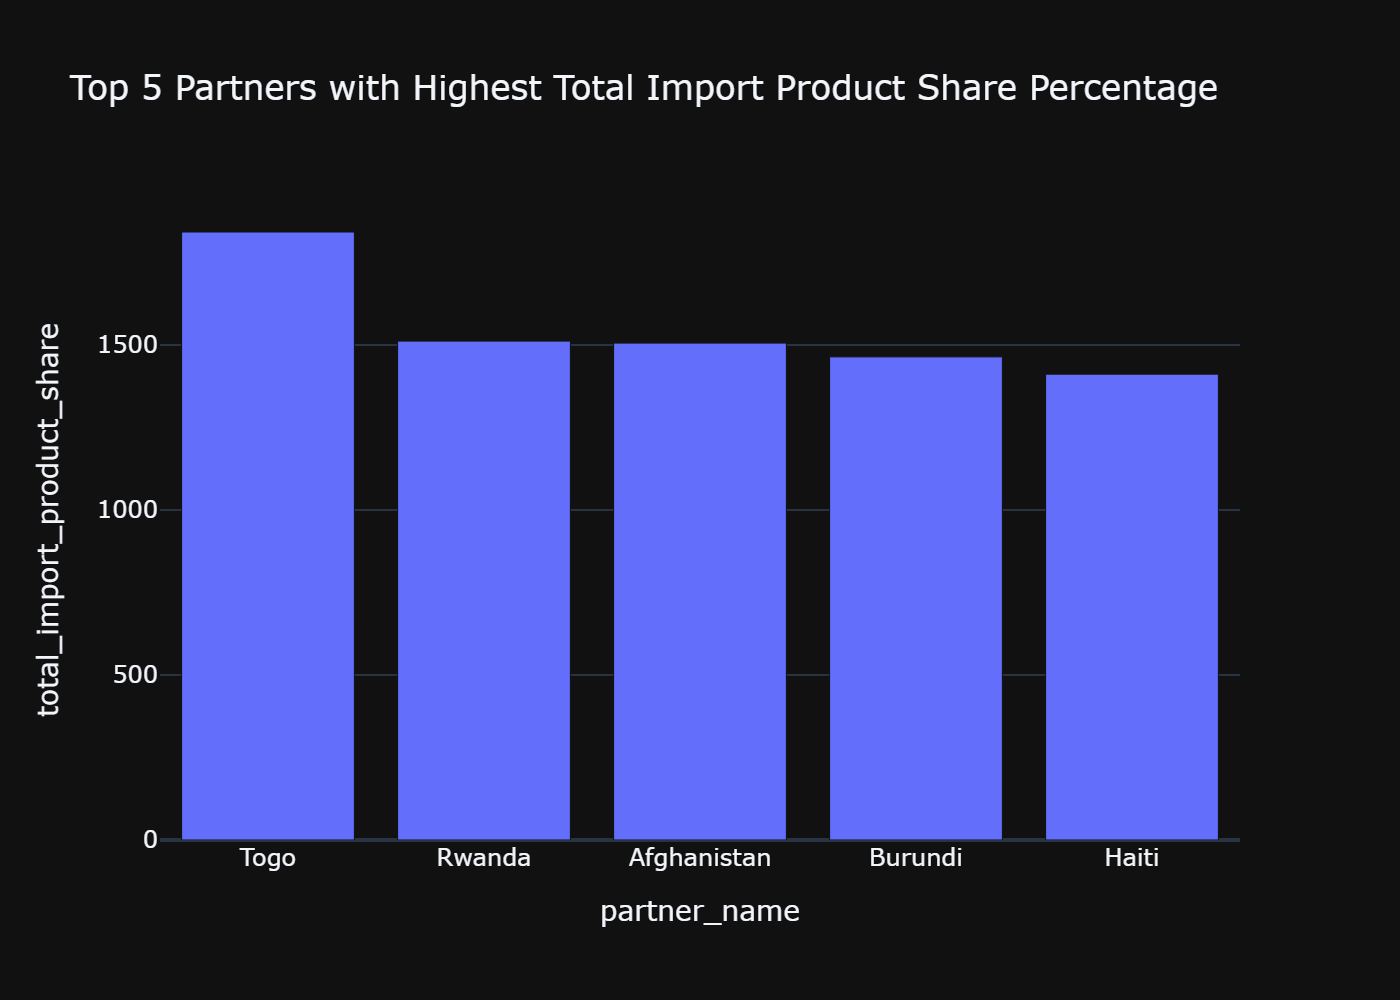

('SELECT \n    partner_name, \n    SUM("import_product_share_(%)") AS total_import_product_share\nFROM trade_data\nGROUP BY partner_name\nORDER BY total_import_product_share DESC\nLIMIT 5;',
   partner_name  total_import_product_share
 0         Togo                     1841.98
 1       Rwanda                     1511.37
 2  Afghanistan                     1505.47
 3      Burundi                     1463.70
 4        Haiti                     1411.33,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'partner_name=%{x}<br>total_import_product_share=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
               'textposition': 'auto',
               'type': 'bar',
               'x': array(['Togo', 'Rwanda', 'Afghanistan', 'Burundi', 'Haiti'], d

In [110]:
vn.ask(question= "What are the top 5 partners with the highest total import product share percentage ")

In [ ]:
from vanna.remote import VannaDefault
vn = VannaDefault(model='tradem', api_key='c3062053c29e43f19d1de9b24aa292bf')
vn.connect_to_sqlite("trade_data.db") # Connect to your database here

from vanna.flask import VannaFlaskApp
VannaFlaskApp(vn).run()

Your app is running at:
http://localhost:8084
 * Serving Flask app 'vanna.flask'
 * Debug mode: on
None
